### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [52]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import fetch_california_housing
from scipy.linalg import svd
from sklearn.datasets import make_regression

In [ ]:
default = pd.read_csv('data/credit.csv', index_col=0)
default.info()
default.head()

In [56]:
object = StandardScaler()
default_scaled = object.fit_transform(default)

pca = PCA(n_components=2)
pca.fit(default_scaled)

In [ ]:
# this function scales (normalizes) the data if scale=True
# then it returns U, Sigma and Vt

def svd_norm(X):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    SigmaDiag = np.diag(sigma)
    return U, sigma, SigmaDiag, VT

# This is the PCA function. r is the number of columns it returns
# Note that normalization is built in so the original dataset can be passed in
def pca(X, r = 5):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    Sigma = np.diag(sigma)
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]
    return pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])

default_dropped = default.drop('default.payment.next.month', axis=1)

U, sigma, Sigma, VT = svd_norm(default_dropped)
sns.pointplot(data=sigma)


In [61]:
default2 = pca(default_dropped,2)
default2['default.payment.next.month'] = default['default.payment.next.month']
default2
px.scatter(data_frame=default2, x = 'pca_1', y = 'pca_2', color = 'default.payment.next.month')

In [48]:
default3 = pca(default,3)
default3['default.payment.next.month'] = default['default.payment.next.month']
default3
px.scatter_3d(data_frame=default3, x = 'pca_1', y = 'pca_2', z = 'pca_3', color = 'default.payment.next.month')

##### Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

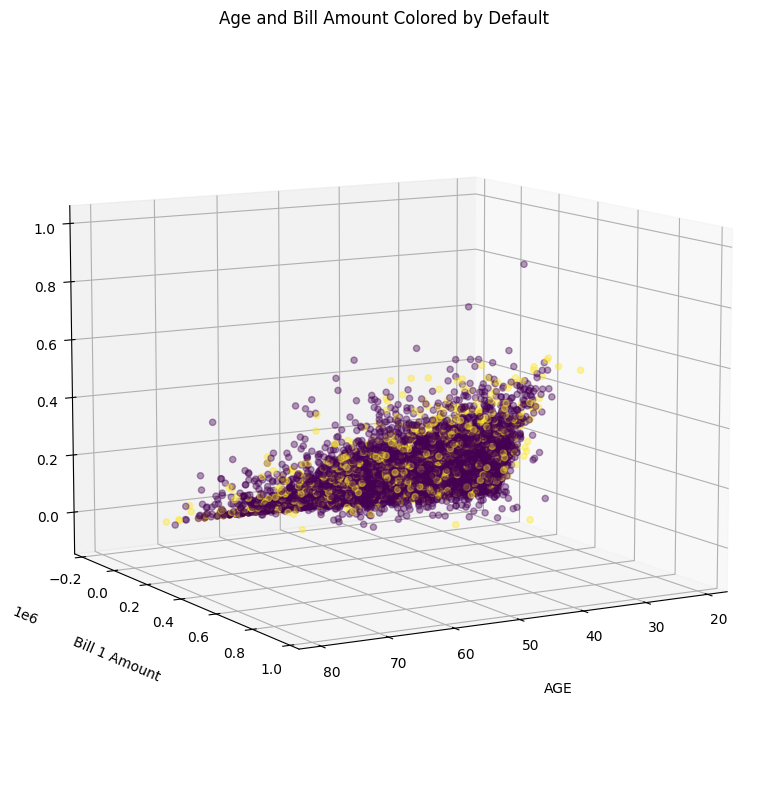

In [5]:
plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')
ax.scatter3D(default['AGE'], default['BILL_AMT1'], default['BILL_AMT2'], c = default['default.payment.next.month'], alpha = 0.4)
ax.set_xlabel('AGE', labelpad = 20)
ax.set_ylabel('Bill 1 Amount', labelpad = 20)
ax.set_zlabel('Bill 2 Amount', labelpad = 20)
ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

In [7]:
# px.scatter_3d(data_frame=default, x = 'AGE', y = 'BILL_AMT1', z = 'BILL_AMT2', color = 'default payment next month')
px.scatter_3d(data_frame=default, x = 'BILL_AMT1', y = 'BILL_AMT2', z = 'AGE', color = 'default.payment.next.month')